In [1]:
# coding: utf-8
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras import metrics

Using TensorFlow backend.


In [50]:
#Sort the data in the file
#read a file
def read_file():
    #最初のカラムである年月日をindexとし、"parse_dates=True"とすることでその値を日付型にします。
    df = pd.read_csv('Precipitation_WL201803to201812.csv', header=0,index_col=0,parse_dates=True)
    return df

In [52]:
# df = read_file()
# print(df)

                      [station]precipitation(mm)  [Ashiaraidani]velocity(m/s)  \
Time                                                                            
2018-03-26 00:00:00                          0.0                         2.37   
2018-03-26 00:10:00                          0.0                         2.37   
2018-03-26 00:20:00                          0.0                         2.37   
2018-03-26 00:30:00                          0.0                         2.36   
2018-03-26 00:40:00                          0.0                         2.37   
2018-03-26 00:50:00                          0.0                         2.37   
2018-03-26 01:00:00                          0.0                         2.36   
2018-03-26 01:10:00                          0.0                         2.37   
2018-03-26 01:20:00                          0.0                         2.37   
2018-03-26 01:30:00                          0.0                         2.37   
2018-03-26 01:40:00         

In [58]:
# 扱う特徴量
FEATURE_VALUE = [" [station]precipitation(mm)"] # Precipitation(per 10min)
# 次元数
DIMENSION = len(FEATURE_VALUE)
# 気象データを取得
df_data = read_file()
# 学習用データを取得(日付順にソート)
df_prec = df_data.ix['2018-03-26 00:00:00':'2019-01-01 00:00:00', FEATURE_VALUE]
df_prec = df_prec.sort_index()
# 欠損値のある行を取り除く（無いけどとりあえず
dd_prec = df_prec.dropna()


C:\Users\yutak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [30]:
# モデルに読み込ませるデータを生成する
# def generate_data(data, length_per_unit, dimension):

    # DataFrame→array変換
data_array = data.as_matrix()
print(data_array)
# 時系列データを入れる箱
sequences = []
# 正解データを入れる箱
target = []
# 正解データの日付を入れる箱
target_date = []

# 一グループごとに時系列データと正解データをセットしていく
for i in range(0, data_array.shape[0] - length_per_unit):
    sequences.append(data_array[i:i + length_per_unit])
    target.append(data_array[i + length_per_unit])
    target_date.append(data[i + length_per_unit: i + length_per_unit + 1].index.strftime('%Y/%m/%d'))

#     # 時系列データを成形
#     X = np.array(sequences).reshape(len(sequences), length_per_unit, dimension)
#     # 正解データを成形
#     Y = np.array(target).reshape(len(sequences), 1)
#     # 正解データの日付データを成形
#     Y_date = np.array(target_date).reshape(len(sequences), 1)

#     return (X, Y, Y_date)

# print()

[['3/26/2018 0:00' 0.0 2.37 4.2]
 ['3/26/2018 0:10' 0.0 2.37 4.2]
 ['3/26/2018 0:20' 0.0 2.37 4.2]
 ...
 ['12/31/2018 23:40' 0.0 1.92 4.6]
 ['12/31/2018 23:50' 0.0 1.92 4.6]
 ['1/1/2019 0:00' 0.0 1.92 4.7]]


C:\Users\yutak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [64]:
#Start using pandas
#The reason I just started pandas is just because I haven't known about pandas until few minites ago haha

df = pd.DataFrame(Data1)
df.columns = Data1title

#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference_mean(5min)']
# X_cols = ['WL_FMR_Avg', 'hp_Tot(3)']
# X_cols = ['Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg', 'L_DR_Avg', 'L_DL_Avg', 'WL_up_Avg', 'WL_cha_Avg', 'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg',
# 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
X_cols = ['hp_Tot(6)','hp_Tot(5)']
# X_cols = ['hp_Tot(5)']
# X_cols = [ 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'vel_P_Tot', 'WL_FMR_Avg','hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)','WL_FMR_Avg']

X = df[X_cols].values.astype('float')
y = df[y_cols].values.astype('float')


In [65]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)


In [66]:
# data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train.ravel())

C:\Users\yutak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
#Score

print(model.score(X_test,y_test))

0.7675417254715623


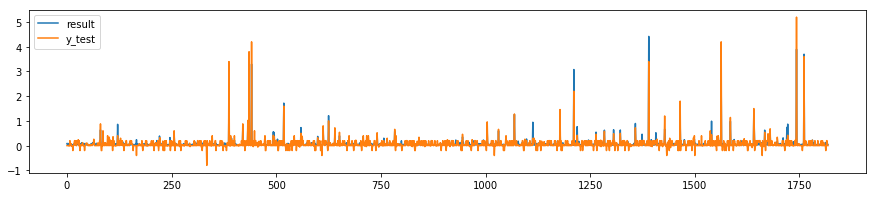

In [52]:
# Results
result = model.predict(X_test)
#flatten y_test to applay the data to a graph
y_test_graph = y_test.flatten()
#
df_result = pd.DataFrame({"y_test":y_test_graph,"result":result})

#
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Draw graph
df_result.plot(figsize=(15, 3))

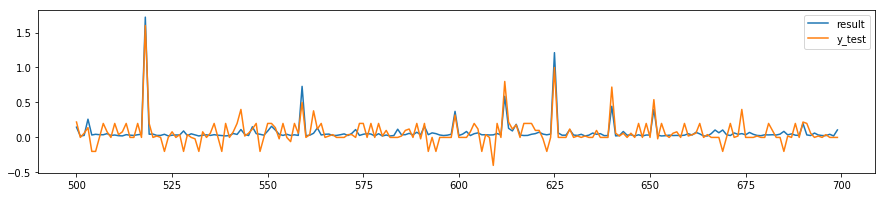

In [69]:
df_result[500:700].plot(figsize=(15, 3))

1   hp_Tot(6)   0.5891305944516716
2   hp_Tot(5)   0.41086940554832846


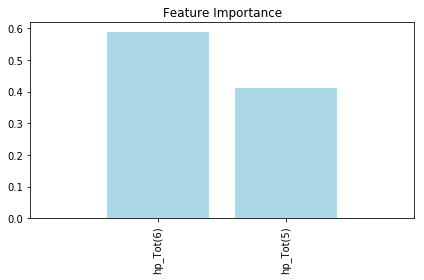

In [54]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [99]:
Data1title

['RECORD',
 'Bat_Avg',
 'Pit_WL_Avg',
 'L_UR_Avg',
 'L_UL_Avg',
 'L_DR_Avg',
 'L_DL_Avg',
 'Load_Avg',
 'Load_Avg_difference',
 'Load_Avg_difference_mean(5min)',
 'WL_up_Avg',
 'WL_cha_Avg',
 'turb1000_Avg',
 'turb4000_Avg',
 'DiffVolt_Avg',
 'hp_Tot(1)',
 'hp_Tot(2)',
 'hp_Tot(3)',
 'hp_Tot(4)',
 'hp_Tot(5)',
 'hp_Tot(6)',
 'vel_P_Tot',
 'WL_FMR_Avg',
 'hp_Tot(7)',
 'hp_Tot(8)',
 'hp_Tot(9)',
 'hp_Tot(10)']

In [86]:
label

Index(['hp_Tot(6)'], dtype='object')